In [1]:
# Part 1 - Data Preprocessing

!pip install pandas
!pip install sklearn 

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers

     |████████████████████████████████| 11.7 MB 625 kB/s eta 0:00:01
     |████████████████████████████████| 503 kB 1.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 31.2 MB 620 kB/s eta 0:00:01    |████████▊                       | 8.5 MB 2.0 MB/s eta 0:00:12
     |████████████████████████████████| 41.6 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 1.3 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1302 sha256=aa887bb24b560a0e37b35501e6f563e9ec3ccc9a9c3ccee749a82683391499c8
  Stored in directory: /root/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# Importing the training set
dataset_train = pd.read_csv('MSFT_train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
training_set.shape

(1223, 1)

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1223):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Initialising the RNN
model = keras.Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(layers.Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(layers.LSTM(units = 50, return_sequences = True))
model.add(layers.Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(layers.LSTM(units = 50, return_sequences = True))
model.add(layers.Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(layers.LSTM(units = 50))
model.add(layers.Dropout(0.2))

# Adding the output layer
model.add(layers.Dense(units = 1))

# display summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [8]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
37/37 [==============================] - 7s 90ms/step - loss: 0.0293
Epoch 2/80
37/37 [==============================] - 3s 88ms/step - loss: 0.0044
Epoch 3/80
37/37 [==============================] - 3s 88ms/step - loss: 0.0037
Epoch 4/80
37/37 [==============================] - 3s 87ms/step - loss: 0.0035
Epoch 5/80
37/37 [==============================] - 3s 88ms/step - loss: 0.0040
Epoch 6/80
37/37 [==============================] - 3s 88ms/step - loss: 0.0032
Epoch 7/80
37/37 [==============================] - 3s 89ms/step - loss: 0.0029
Epoch 8/80
37/37 [==============================] - 3s 89ms/step - loss: 0.0028
Epoch 9/80
37/37 [==============================] - 3s 89ms/step - loss: 0.0034
Epoch 10/80
37/37 [==============================] - 3s 89ms/step - loss: 0.0030
Epoch 11/80
37/37 [==============================] - 3s 88ms/step - loss: 0.0028
Epoch 12/80
37/37 [==============================] - 3s 89ms/step - loss: 0.0028
Epoch 13/80
37/37 [==================

In [9]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('MSFT_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [10]:
real_stock_price.shape

(36, 1)

In [11]:
# Getting the predicted stock price of last two months
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
# 96 is the 60 day interval plus the 36 days since 1st Apr
for i in range(60, 96):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 21ms/step


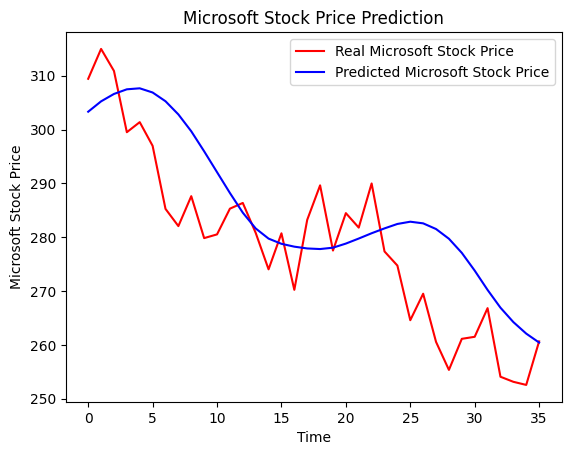

In [12]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Microsoft Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()